# LIBRARIES IMPORT

In [1]:
# imports

import fig_lib 
import CNN_lib
import numpy as np
import time
import pickle


In [2]:
init_time = time.time()

In [3]:

generate_new_peakle=True

# ------- GENERATE SYNTHETIC DATA --------------

pkl_train_synt_p='C:\PROJECTS\emboendo\CNN/pikles/synthetic_train_d.pkl'

# --------- LOAD TRAIN DATA ------------

load_train_data=False

# --------- DATA TYPE ------------
video_d=True                                    # Video = True , Image = False 


In [4]:
# -------- DATA PARAMS --------               

total_n_recs=600
#n_recs_train,n_recs_eval=300,80
HEIGHT, WIDTH = 150, 150
circles_filled=False
color=255

# -------- Video ---------

n_frames=[15,20]    # [min,max]

t_btw_frm=0.2

In [5]:
#input_d, eval_d

if video_d:
    
    input_d=fig_lib.vid_data_gen(HEIGHT, WIDTH,total_n_recs,n_frames,'I',cir_f=circles_filled,color=color)
    
else:

    input_d=fig_lib.im_data_gen(HEIGHT, WIDTH,total_n_recs,'I',cir_f=circles_filled,color=color)

print('FIRST LAYER KEYS:', list(input_d.keys()))
print('SECOND LAYER KEYS:',list(input_d[list(input_d.keys())[0]].keys()))
print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[0]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]]),'Example:',input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]])
print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[1]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]),'Example shape:',np.shape(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]))


FIRST LAYER KEYS: ['I0', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20', 'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I27', 'I28', 'I29', 'I30', 'I31', 'I32', 'I33', 'I34', 'I35', 'I36', 'I37', 'I38', 'I39', 'I40', 'I41', 'I42', 'I43', 'I44', 'I45', 'I46', 'I47', 'I48', 'I49', 'I50', 'I51', 'I52', 'I53', 'I54', 'I55', 'I56', 'I57', 'I58', 'I59', 'I60', 'I61', 'I62', 'I63', 'I64', 'I65', 'I66', 'I67', 'I68', 'I69', 'I70', 'I71', 'I72', 'I73', 'I74', 'I75', 'I76', 'I77', 'I78', 'I79', 'I80', 'I81', 'I82', 'I83', 'I84', 'I85', 'I86', 'I87', 'I88', 'I89', 'I90', 'I91', 'I92', 'I93', 'I94', 'I95', 'I96', 'I97', 'I98', 'I99', 'I100', 'I101', 'I102', 'I103', 'I104', 'I105', 'I106', 'I107', 'I108', 'I109', 'I110', 'I111', 'I112', 'I113', 'I114', 'I115', 'I116', 'I117', 'I118', 'I119', 'I120', 'I121', 'I122', 'I123', 'I124', 'I125', 'I126', 'I127', 'I128', 'I129', 'I130', 'I131', 'I132', 'I133', 'I134', 'I135', 'I1

# CHECK DATA

In [6]:
print('RECORD - LABEL - SHAPE')

    
for R in input_d.keys():
    print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))

RECORD - LABEL - SHAPE
I0 0 (17, 150, 150) <class 'numpy.ndarray'>
I1 1 (17, 150, 150) <class 'numpy.ndarray'>
I2 0 (15, 150, 150) <class 'numpy.ndarray'>
I3 0 (17, 150, 150) <class 'numpy.ndarray'>
I4 0 (16, 150, 150) <class 'numpy.ndarray'>
I5 0 (20, 150, 150) <class 'numpy.ndarray'>
I6 0 (16, 150, 150) <class 'numpy.ndarray'>
I7 0 (17, 150, 150) <class 'numpy.ndarray'>
I8 0 (15, 150, 150) <class 'numpy.ndarray'>
I9 1 (16, 150, 150) <class 'numpy.ndarray'>
I10 1 (16, 150, 150) <class 'numpy.ndarray'>
I11 1 (16, 150, 150) <class 'numpy.ndarray'>
I12 0 (18, 150, 150) <class 'numpy.ndarray'>
I13 1 (15, 150, 150) <class 'numpy.ndarray'>
I14 0 (16, 150, 150) <class 'numpy.ndarray'>
I15 0 (20, 150, 150) <class 'numpy.ndarray'>
I16 0 (20, 150, 150) <class 'numpy.ndarray'>
I17 1 (18, 150, 150) <class 'numpy.ndarray'>
I18 1 (18, 150, 150) <class 'numpy.ndarray'>
I19 0 (17, 150, 150) <class 'numpy.ndarray'>
I20 0 (17, 150, 150) <class 'numpy.ndarray'>
I21 1 (17, 150, 150) <class 'numpy.ndarray

In [7]:
d_plt_check,rec_check=True,'I1'
t_btw_frm=0.05
print(input_d[rec_check]['label'])


1


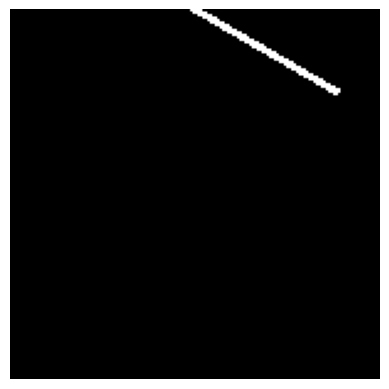

In [8]:
# check video

if d_plt_check:

    if video_d:fig_lib.vid_show(input_d[rec_check]['image'],t_btw_frm=t_btw_frm)
    else:fig_lib.im_show(input_d[rec_check]['image'])



# CNN

### GENERATE TRAIN DATA

In [9]:
# X_train,Y_train 


if video_d:X_train,Y_train,max_frm_n,HEIGHT, WIDTH =CNN_lib.vid_d_bin_gen(input_d, zero=0, one= 1)
else:X_train,Y_train =CNN_lib.im_d_bin_gen(input_d,zero='circle', one= 'line')


In [ ]:
idx_permut = np.random.permutation(len(X_train))
X_train,Y_train=X_train[idx_permut],Y_train[idx_permut]

In [ ]:

save_trains=[X_train,Y_train]

with open(pkl_train_synt_p, 'wb') as pikle_file:
        
        pickle.dump(save_trains, pikle_file)



In [10]:
end_time = time.time()

process_time = end_time - init_time
print(f"Tiempo transcurrido: {process_time} segundos")

Tiempo transcurrido: 3.1448421478271484 segundos
